# Démonstration manipulation des données extraites de l'API

Ce notebook présente comment les données pourraient être affichées et comment elles pourraient être utiles pour construite un modèle prédictif des emplacements et vélos disponibles sur le réseau Vélo Toulouse

In [13]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [14]:
df = pd.read_csv('Extract_data_test.csv')
df

,Unnamed: 0,datetime,number,name,address,bike_stands,available_bike_stands,available_bikes
0,146,2025-10-21 13:01:32+02:00,402,00402 - GRYNFOGEL - GAILLARDIE,"Face 130, Chemin de Gaillardie",16,16,0
1,280,2025-10-21 13:01:37+02:00,261,00261 - VAN DYCK - RAPHAËL,DEVANT 6 RUE VAN DICK / FACE RUE RAPHAEL,18,12,0
2,396,2025-10-21 13:01:38+02:00,203,00203 - ST-EXUPERY - PETIT PRINCE,2 AV ANTOINE DE ST EXUPERY,20,10,10
3,142,2025-10-21 13:01:41+02:00,252,00252 - CATELLAN - CAZENEUVE,RUE MARIE CLAIRE DE CATELLAN (10M AVANT LE PON...,18,4,12
4,208,2025-10-21 13:01:50+02:00,312,00312 - BASE DE LOISIRS SESQUIERES,Lac de Sesquières - Devant l'entrée Wam Park,13,9,4
...,...,...,...,...,...,...,...,...
7758,77,2025-10-21 14:10:35+02:00,175,00175 - BORDEROUGE - MÉTRO,FACE 52 AV BOURGES MAUNOURY,30,18,11
7759,351,2025-10-21 14:10:35+02:00,317,00317 - GAUSSEN - CROIX-BÉNITE,"Face, 22 - 24 boulevard Henri Gaussen",13,10,3
7760,64,2025-10-21 14:10:35+02:00,3004,03004 - MONTEL - LANGUEDOC,"Devant 17, boulevard Eugène Montel - Tournefeu...",16,5,11
7761,415,2025-10-21 14:10:36+02:00,14,00014 - PERIGORD,26 RUE DE PERIGORD,17,11,5


On sélectionne deux stations à étudier: celle de l'ISAE-SUPAERO et celle de la Place Saint Pierre.

In [16]:
# --- Liste des stations ---
stations = {
    224: "BELIN - SUPAERO",
    28: "SAINT-PIERRE",
}

On trace les séries temporelles représentant l'évolution de la disponibilité des vélos et emplacements disponibles dans ces stations. Les données ont été collectées le 21 Octobre 2025, de 13h10 à 14h10. 

In [ ]:
# --- Création du subplot (2 lignes, 1 colonne) ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=[f"{name} (Station {num})" for num, name in stations.items()],
    vertical_spacing=0.1
)

# --- Couleurs cohérentes ---
color_bornes = px.colors.qualitative.Plotly[0]  # bleu
color_velos = px.colors.qualitative.Plotly[1]   # orange

# --- Calcul de l'extension de l'axe X ---
df["datetime"] = pd.to_datetime(df["datetime"])
x_min = df['datetime'].min()
x_max = df['datetime'].max()
x_extended = x_max
# x_extended = x_min + 2 * (x_max - x_min)  # moitié droite vide

for i, (num, name) in enumerate(stations.items(), start=1):
    df_station = df[df["number"] == num]

    # Bornes libres
    fig.add_trace(
        go.Scatter(
            x=df_station["datetime"],
            y=df_station["available_bike_stands"],
            mode="lines+markers",
            name="Bornes libres" if i == 1 else None,  # une seule légende
            line=dict(color=color_bornes, width=3),
            marker=dict(size=5, symbol="circle"),
        ),
        row=i, col=1
    )

    # Vélos disponibles
    fig.add_trace(
        go.Scatter(
            x=df_station["datetime"],
            y=df_station["available_bikes"],
            mode="lines+markers",
            name="Vélos disponibles" if i == 1 else None,  # une seule légende
            line=dict(color=color_velos, width=3, dash="dot"),
            marker=dict(size=5, symbol="square"),
        ),
        row=i, col=1
    )

for i in range(1, 3):
    fig.add_trace(
        go.Scatter(
            x=[x_extended],
            y=[0],
            mode="markers",
            marker=dict(opacity=0),
            showlegend=False
        ),
        row=i, col=1
    )

fig.update_layout(
    height=1000,
    title=dict(
        text="Évolution du nombre de vélos et bornes libres — Toulouse",
        x=0.5,
        xanchor="center",
        font=dict(size=22)
    ),
    xaxis=dict(
        title="Date et heure",
        range=[x_min, x_extended],
        showgrid=True,
        gridcolor="rgba(220,220,220,0.3)",
        tickformat="%d/%m %H:%M"
    ),
    xaxis2=dict(
        title="Date et heure",
        range=[x_min, x_extended],
        showgrid=True,
        gridcolor="rgba(220,220,220,0.3)",
        tickformat="%d/%m %H:%M"
    ),
    yaxis=dict(title="Nombre", showgrid=True, gridcolor="rgba(220,220,220,0.3)"),
    yaxis2=dict(title="Nombre", showgrid=True, gridcolor="rgba(220,220,220,0.3)"),
    plot_bgcolor="white",
    hovermode="x unified",
    legend=dict(
        title="Légende",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    font=dict(family="Arial", size=13)
)

fig.update_annotations(font_size=16)
fig.show()

Le but est maintenant d'avoir un modèle de forecasting qui "prolonge" ces courbes

Dans la suite, on teste différents modèles d'ARIMA. On ne s'attend pas à des résultats très satisfaisants étant donnés que l'on a très peu de données. Mais cela permet de donner un exemple de comment on pourrait construire un modèle prédictif grâce aux données que l'on a collectées.

In [1]:
# Importation des librairies
from utilsforecast.plotting import plot_series
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore


In [ ]:
# On sélectionne la station St Pierre
df_stpierre = df[df['number'] == 28][['datetime', 'available_bikes']]
df_stpierre = df_stpierre.assign(unique_id="ST_PIERRE")
df_stpierre

,datetime,available_bikes,unique_id
292,2025-10-21 13:10:23+02:00,12,ST_PIERRE
527,2025-10-21 13:12:25+02:00,13,ST_PIERRE
634,2025-10-21 13:13:14+02:00,12,ST_PIERRE
858,2025-10-21 13:15:10+02:00,11,ST_PIERRE
975,2025-10-21 13:16:05+02:00,10,ST_PIERRE
1141,2025-10-21 13:17:32+02:00,11,ST_PIERRE
1251,2025-10-21 13:18:29+02:00,10,ST_PIERRE
1381,2025-10-21 13:19:30+02:00,10,ST_PIERRE
1419,2025-10-21 13:19:46+02:00,9,ST_PIERRE
1792,2025-10-21 13:23:03+02:00,8,ST_PIERRE


In [ ]:
# les modèles utilisés sont stricts par rapport aux nom des colonnes
df_stpierre = df_stpierre.rename(columns={
    "datetime": "ds",
    "available_bikes": "y"
})
df_stpierre

,ds,y,unique_id
292,2025-10-21 13:10:23+02:00,12,ST_PIERRE
527,2025-10-21 13:12:25+02:00,13,ST_PIERRE
634,2025-10-21 13:13:14+02:00,12,ST_PIERRE
858,2025-10-21 13:15:10+02:00,11,ST_PIERRE
975,2025-10-21 13:16:05+02:00,10,ST_PIERRE
1141,2025-10-21 13:17:32+02:00,11,ST_PIERRE
1251,2025-10-21 13:18:29+02:00,10,ST_PIERRE
1381,2025-10-21 13:19:30+02:00,10,ST_PIERRE
1419,2025-10-21 13:19:46+02:00,9,ST_PIERRE
1792,2025-10-21 13:23:03+02:00,8,ST_PIERRE


In [ ]:
# Division en test (5 derniers points) et train set
df_stpierre_test = df_stpierre.tail(5)
df_stpierre_train = df_stpierre.drop(df_stpierre_test.index).reset_index(drop=True)
df_stpierre_train

,ds,y,unique_id
0,2025-10-21 13:10:23+02:00,12,ST_PIERRE
1,2025-10-21 13:12:25+02:00,13,ST_PIERRE
2,2025-10-21 13:13:14+02:00,12,ST_PIERRE
3,2025-10-21 13:15:10+02:00,11,ST_PIERRE
4,2025-10-21 13:16:05+02:00,10,ST_PIERRE
5,2025-10-21 13:17:32+02:00,11,ST_PIERRE
6,2025-10-21 13:18:29+02:00,10,ST_PIERRE
7,2025-10-21 13:19:30+02:00,10,ST_PIERRE
8,2025-10-21 13:19:46+02:00,9,ST_PIERRE
9,2025-10-21 13:23:03+02:00,8,ST_PIERRE


In [ ]:
# On teste un modèle ARIMA simple, puis un autre qui prend en compte une saisonnalité de 10 min
models = [
    AutoARIMA(seasonal=False, alias="ARIMA"),
    AutoARIMA(season_length=10, alias="SARIMA")
]


# On fait une prédiction sur les 5 prochaines minutes
horizon = 5


sf = StatsForecast(models=models, freq="min")
sf.fit(df=df_stpierre_train)
arima_preds = sf.predict(h=horizon)

arima_preds.head()


,unique_id,ds,ARIMA,SARIMA
0,ST_PIERRE,2025-10-21 14:02:16+02:00,15.278299,15.278299
1,ST_PIERRE,2025-10-21 14:03:16+02:00,16.556599,16.556599
2,ST_PIERRE,2025-10-21 14:04:16+02:00,17.834900,17.834900
3,ST_PIERRE,2025-10-21 14:05:16+02:00,19.113199,19.113199
4,ST_PIERRE,2025-10-21 14:06:16+02:00,20.391499,20.391499


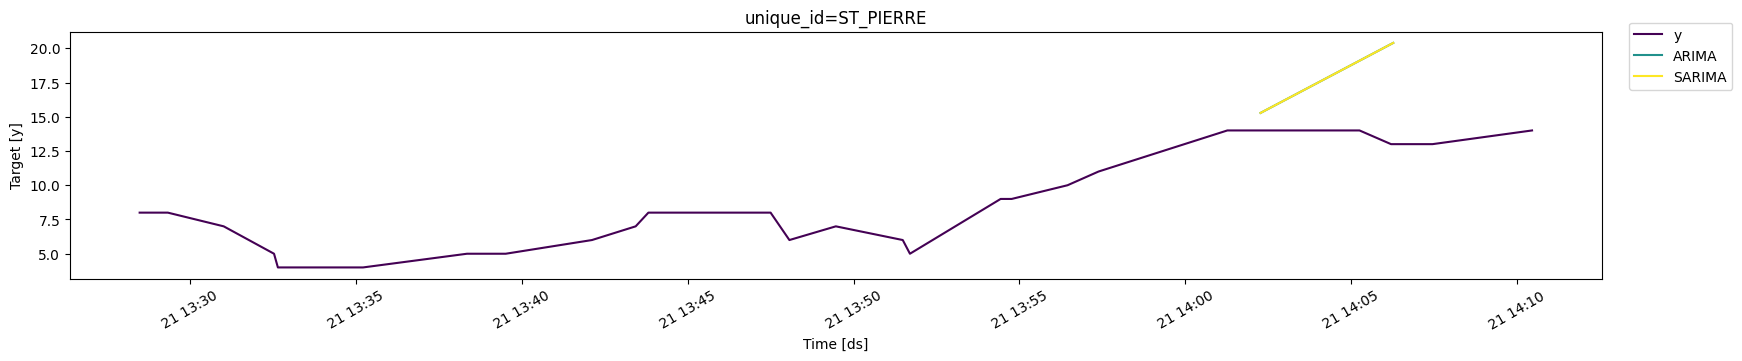

In [65]:
plot_series(
    df=df_stpierre, 
    forecasts_df=arima_preds, 
    ids=["ST_PIERRE"], 
    max_insample_length=28, 
    palette="viridis")

Les prédictions sont comme attendu très mauvaises. Voyons comment les modèles prédiraient le "futur"

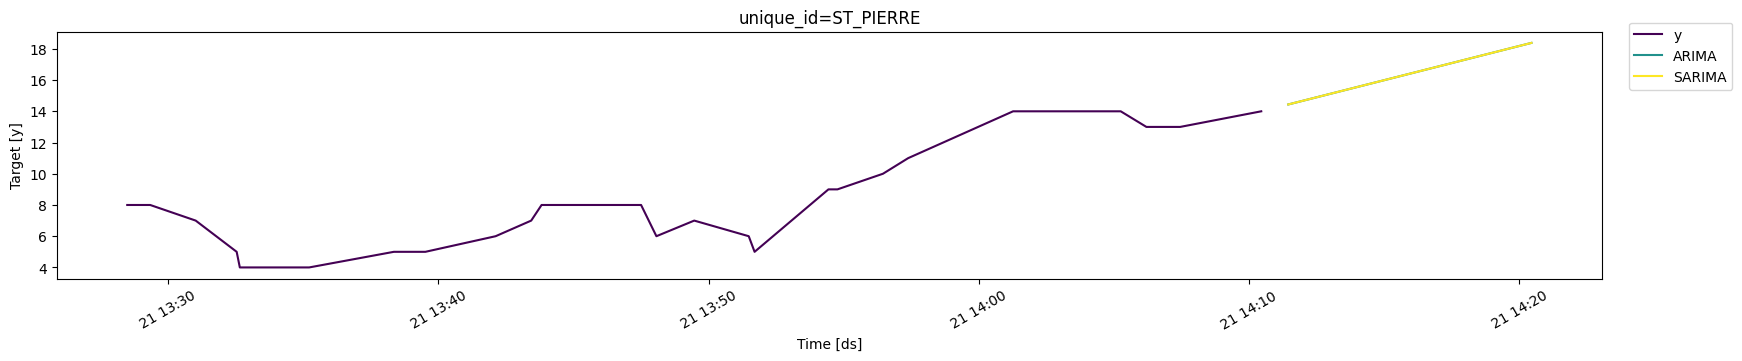

In [57]:
horizon = 10

models = [
    AutoARIMA(seasonal=False, alias="ARIMA"),
    AutoARIMA(season_length=60, alias="SARIMA")
]

sf = StatsForecast(models=models, freq="min")
sf.fit(df=df_stpierre)
arima_preds = sf.predict(h=horizon)

plot_series(
    df=df_stpierre, 
    forecasts_df=arima_preds, 
    ids=["ST_PIERRE"], 
    max_insample_length=28, 
    palette="viridis")